In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression





C:\Users\eitan\AppData\Local\Temp\ipykernel_35984\3275133874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Outline of Project:

We will assign a numeric score between 1 and 10 for each of the following six dimensions:
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in
general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about
the topic? Would a reader who already knew about the topic feel like s/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that
would give a lagging reader additional help on specific topics, or an advanced reader the ability to
dive more deeply into a specific application area or technique?
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand
the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people
actually read through the entire thing



**Introduction**
The Federal Bureau of Investigation reported 6,263 hate crimes in the US in 2016, 7,864 in 2019, and 11,613 in 2022--an 85% increase over six years. In response to an alarming surge in hate crimes across the nation, we present a comprehensive model aimed at tracking and analyzing this disturbing trend. The escalating incidence of hate-motivated offenses underscores the urgent need for proactive measures to understand the trends so they can be addressed. Our model incorporates 



**The Data**
This tutorial utilizes a dataset acquired from the Anti-Defamation League. The HEATMapData (1).csv file contains 51,870 hate crimes between 2016 and 2023. Each hate crime is identified based on some of the following categories: ID, Date, City, State, Type, Ideology, Subideology, Group, Description, Image. For the purpose of this study we are considering Date (when the incident was reported), State (where the incident occurred), Type (category of hate crime, further defined below), and Description (what specifically the incident was). In addition to not requiring the other columns for this particular study, these columns were all completed for every data entry.

The Types of incidents identified in this study are as follows: Antisemitic Incidents (including vandalism, harassment, and assault), Anti-LGBTQ+ (including vandalism, harassment, and assault), White Supremacist Incidents, Extremist Incidents, and Terrorist Incidents (including plots and attacks). Any incident can be labled with one or more of these Types. 

Before beginning data analysis and prediction, we have cleaned the data to remove unneeded columns and to combine similar categories for better representation of types of hate crimes. Another minor change was made, with a new column of Year being added based on the Date column for easier data management and comparisons further on. 

## Data Collection 


In [2]:
#Load from csv file
file_path = 'hate_crime.csv'

#read into a DataFrame
all_data = pd.read_csv(file_path)

#Display the DataFrame
print(all_data)

        incident_id  data_year        ori        pug_agency_name  \
0                43       1991  AR0350100             Pine Bluff   
1                44       1991  AR0350100             Pine Bluff   
2                45       1991  AR0600300      North Little Rock   
3                46       1991  AR0600300      North Little Rock   
4                47       1991  AR0670000                 Sevier   
...             ...        ...        ...                    ...   
241658      1473449       2022  WY0190200           Rock Springs   
241659      1473450       2022  WY0010200  University of Wyoming   
241660      1476554       2022  WY0190000             Sweetwater   
241661      1476555       2022  WY0110100               Cheyenne   
241662      1479088       2022  WY0190100            Green River   

       pub_agency_unit       agency_type_name state_abbr state_name  \
0                  NaN                   City         AR   Arkansas   
1                  NaN                   

#### Data Cleaning 

In [3]:
# Print column titles
column_names = all_data.columns.tolist()
print(column_names)

# Check for missing values
missing_values = all_data.isnull().sum()
print("Missing Values:")
print(missing_values)

#SHOULD DO SMN HERE TO ADDRESS THE MISSING DATA. IN THIS CASE MAYBE JUST DROP THE CATEGORIES WITH MISSING DATA B/C IRRELEVANT. 



['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'state_name', 'division_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'adult_victim_count', 'juvenile_victim_count', 'total_offender_count', 'adult_offender_count', 'juvenile_offender_count', 'offender_race', 'offender_ethnicity', 'victim_count', 'offense_name', 'total_individual_victims', 'location_name', 'bias_desc', 'victim_types', 'multiple_offense', 'multiple_bias']
Missing Values:
incident_id                          0
data_year                            0
ori                                  0
pug_agency_name                      0
pub_agency_unit                 234474
agency_type_name                     0
state_abbr                           0
state_name                           0
division_name                        0
region_name                          0
population_group_code              555
population_group_descri

## Data Processing

In [4]:
#FIGURE OUT WHAT IS ACTUALLY THE RELEVANT DATA TO OUR CASE - what do we want to explore? 

only_relevant = all_data[['data_year','state_name', 'agency_type_name', 'bias_desc', 'offense_name', 'incident_date']]
print(only_relevant)

        data_year state_name       agency_type_name  \
0            1991   Arkansas                   City   
1            1991   Arkansas                   City   
2            1991   Arkansas                   City   
3            1991   Arkansas                   City   
4            1991   Arkansas                 County   
...           ...        ...                    ...   
241658       2022    Wyoming                   City   
241659       2022    Wyoming  University or College   
241660       2022    Wyoming                 County   
241661       2022    Wyoming                   City   
241662       2022    Wyoming                   City   

                                                bias_desc  \
0                          Anti-Black or African American   
1                                              Anti-White   
2                                              Anti-White   
3                                              Anti-White   
4                          Anti-Bl

## Exploratory Data Analysis:




### Data Exploration and Visualization:

general hate crimes  
-hate crimes by category 

-hate crimes over the years 

-hate crimes in diff agencies
 
-hate crimes per state 


Conduct further exploratory data analysis to gain insights into the characteristics of hate crimes. This can involve creating additional visualizations, such as bar plots, pie charts, or heatmaps, to analyze different aspects of the data such as demographics of victims and perpetrators, types of crimes, locations, and time trends.


-overall hate crime increase over the years 
-can make a separate dataframe with just overall numbers per year in any category and find other data to account for it 

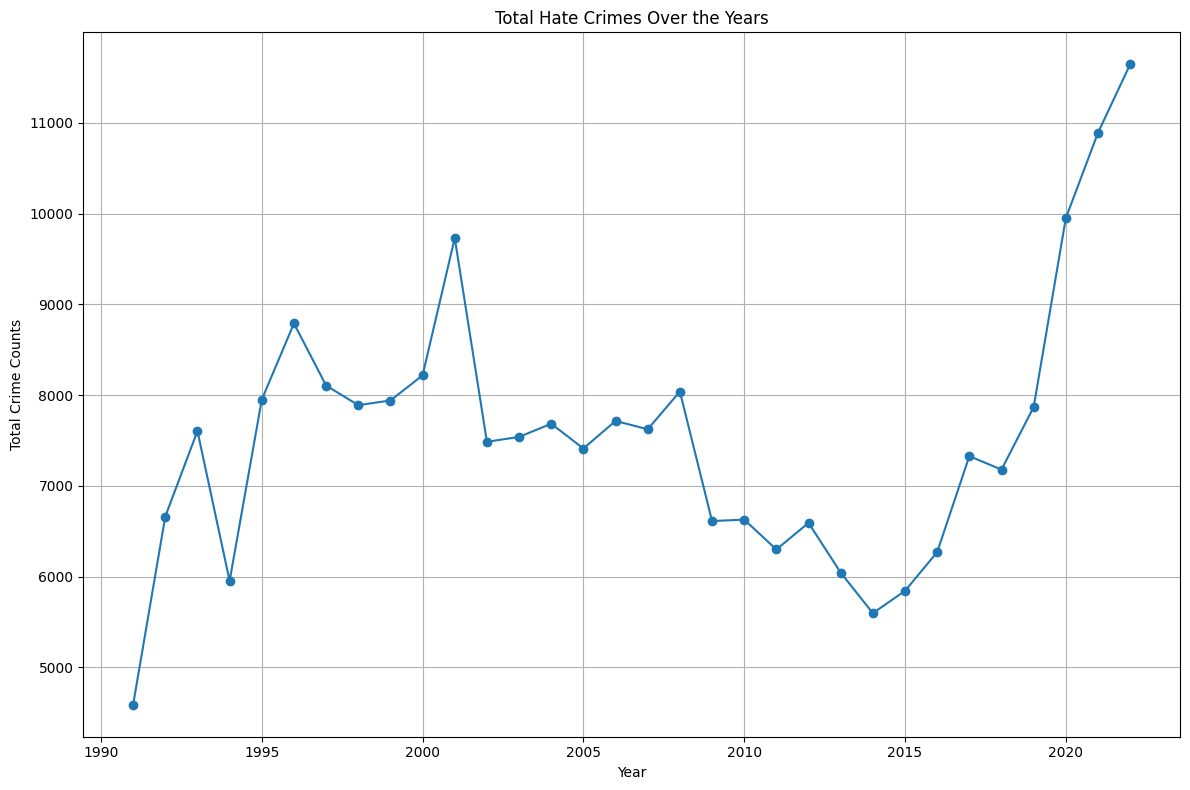

In [5]:
# Group the expanded_data DataFrame by 'data_year' and count the total number of hate crimes for each year
total_crime_counts = only_relevant.groupby('data_year').size().reset_index(name='total_crimes')

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(total_crime_counts['data_year'], total_crime_counts['total_crimes'], marker='o', linestyle='-')

plt.title('Total Hate Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

Breaking down the hate crimes into specific bias categories. To see different trends over the years. 

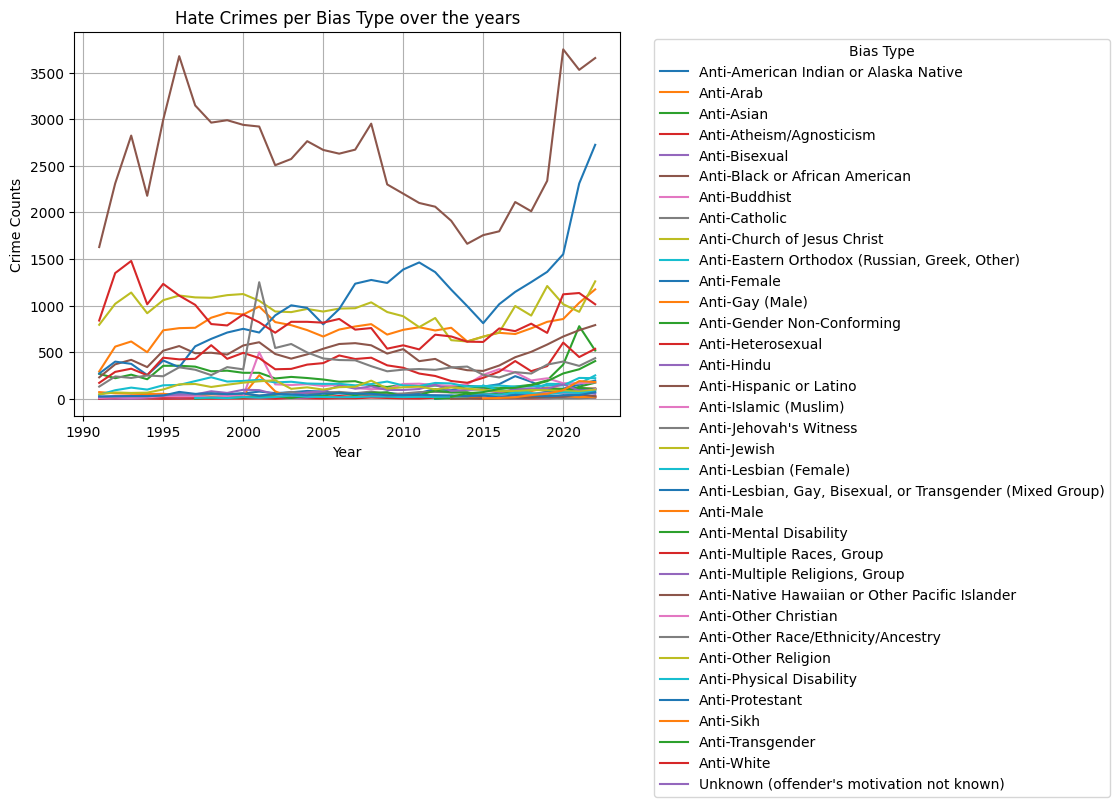

In [6]:
og_expand = only_relevant.assign(bias_desc=only_relevant['bias_desc'].str.split(', ')).explode('bias_desc')
expanded_data = og_expand.assign(bias_desc=only_relevant['bias_desc'].str.split(';')).explode('bias_desc')

crime_counts = expanded_data.groupby(['data_year', 'bias_desc']).size().reset_index(name='count_of_crimes')

pivot_table = crime_counts.pivot(index='data_year', columns='bias_desc', values='count_of_crimes')

for category in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[category], label=category)

plt.title('Hate Crimes per Bias Type over the years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()

plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

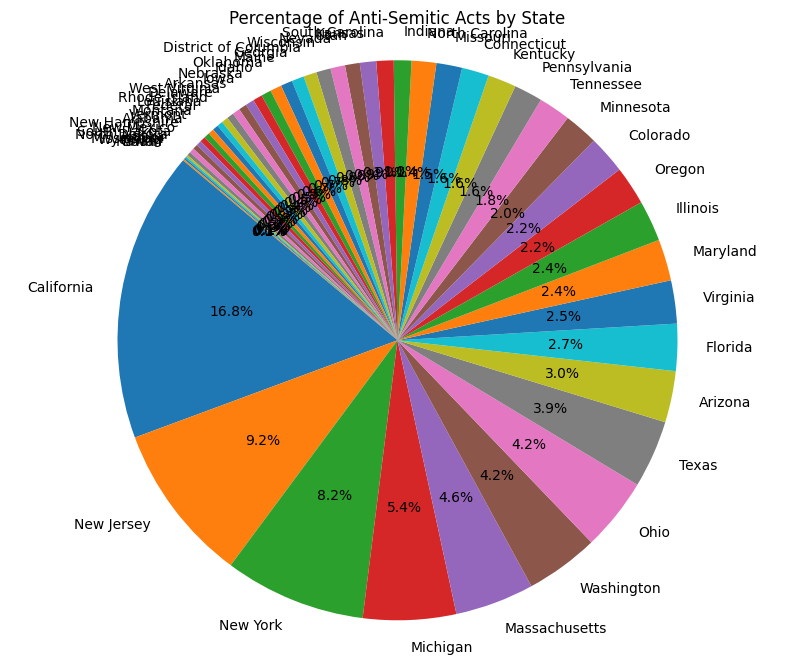

In [7]:
percentage_per_state = (expanded_data['state_name'].value_counts() / len(expanded_data)) * 100

# Plotting
plt.figure(figsize=(10, 8))
percentage_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Anti-Semitic Acts by State')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


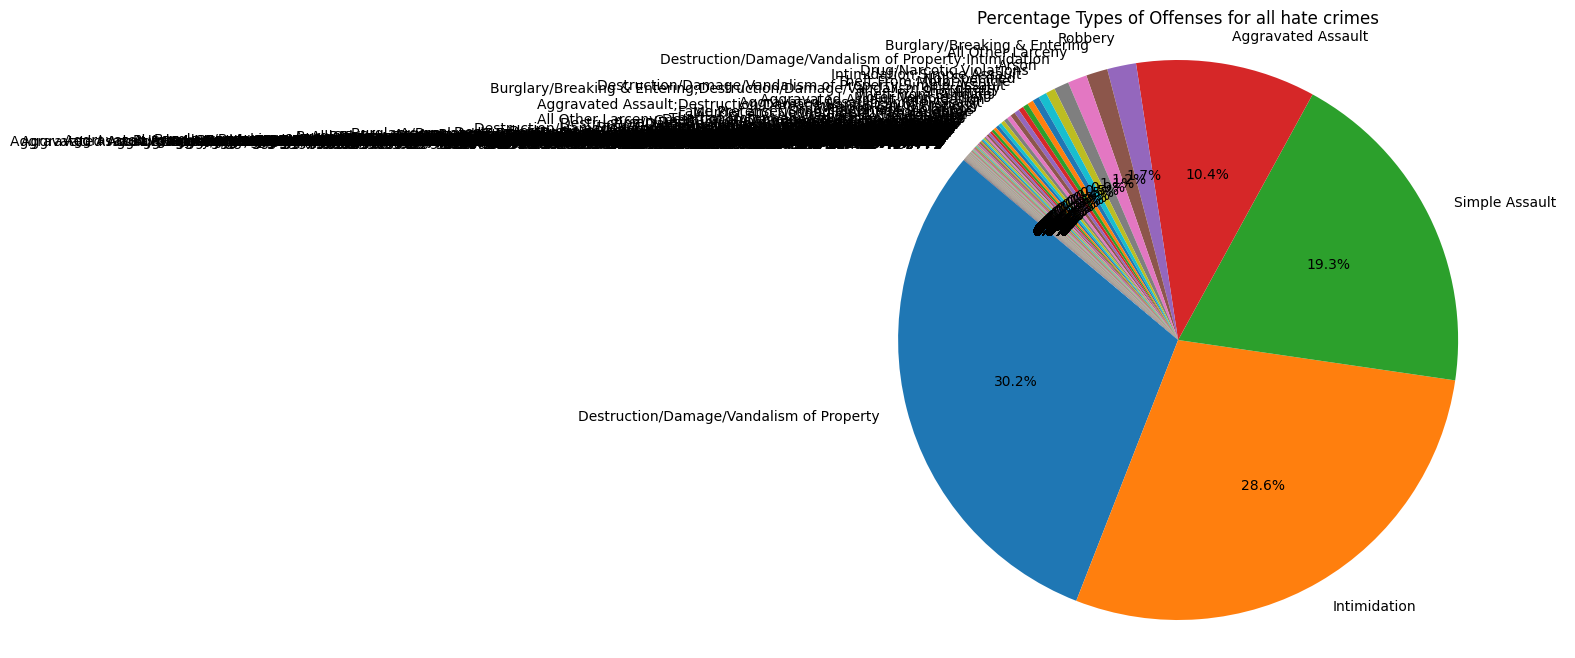

In [8]:
percentage_per_state = (expanded_data['offense_name'].value_counts() / len(expanded_data)) * 100

# Plotting
plt.figure(figsize=(10, 8))
percentage_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Types of Offenses for all hate crimes')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### Antisemetism 

Our topic of interest.
Provide visualization for it and then summarize and report after. 

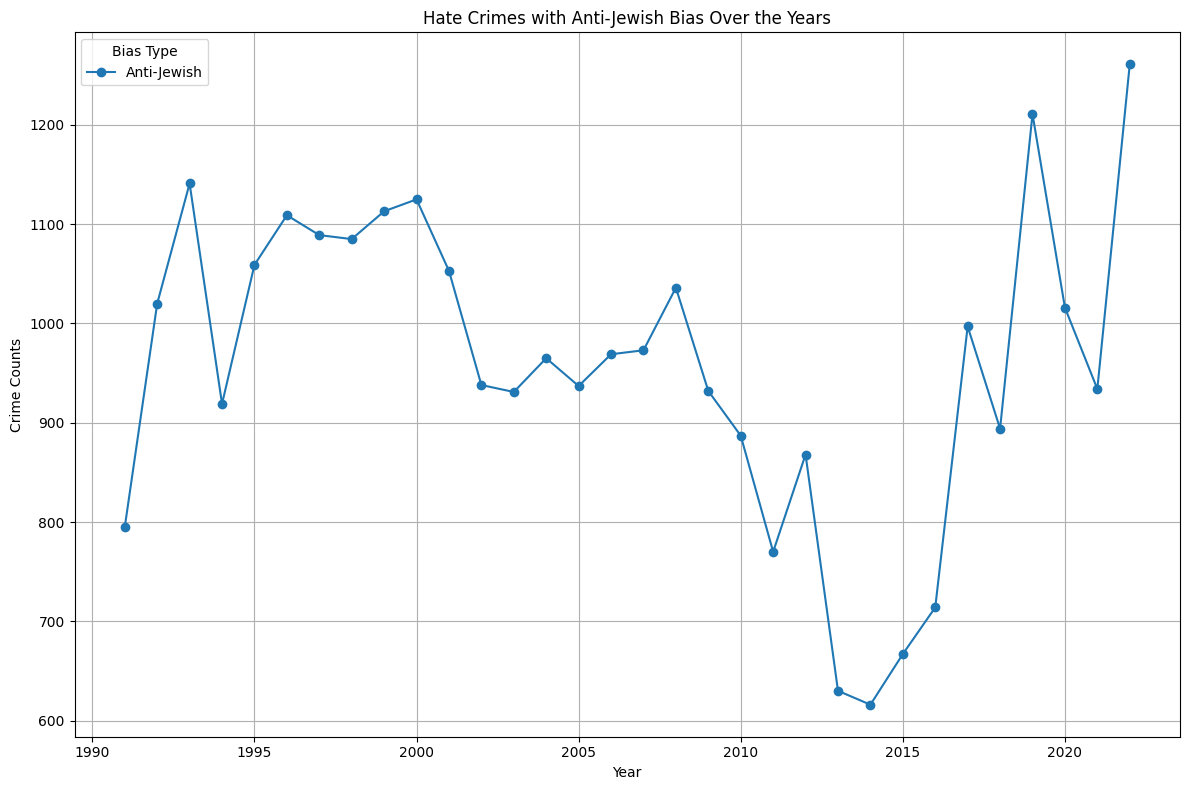

In [9]:
# Filter the expanded_data DataFrame to include only the rows with the "Anti-Jewish" bias category
anti_jewish_data = expanded_data[expanded_data['bias_desc'] == 'Anti-Jewish']

# Group the filtered data by 'data_year' and count the number of hate crimes for each year
crime_counts_anti_jewish = anti_jewish_data.groupby('data_year').size().reset_index(name='count_of_crimes')

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(crime_counts_anti_jewish['data_year'], crime_counts_anti_jewish['count_of_crimes'], marker='o', label='Anti-Jewish')

plt.title('Hate Crimes with Anti-Jewish Bias Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Bias Type')
plt.show()

#maybe after this we can make a linear regression model to predict the number of antisemetic acts that would occur in 2023-2024


#Maybe here we can import data specifically for antisemetic acts in 2023 & 2024 

#its also worth noting historical context? 


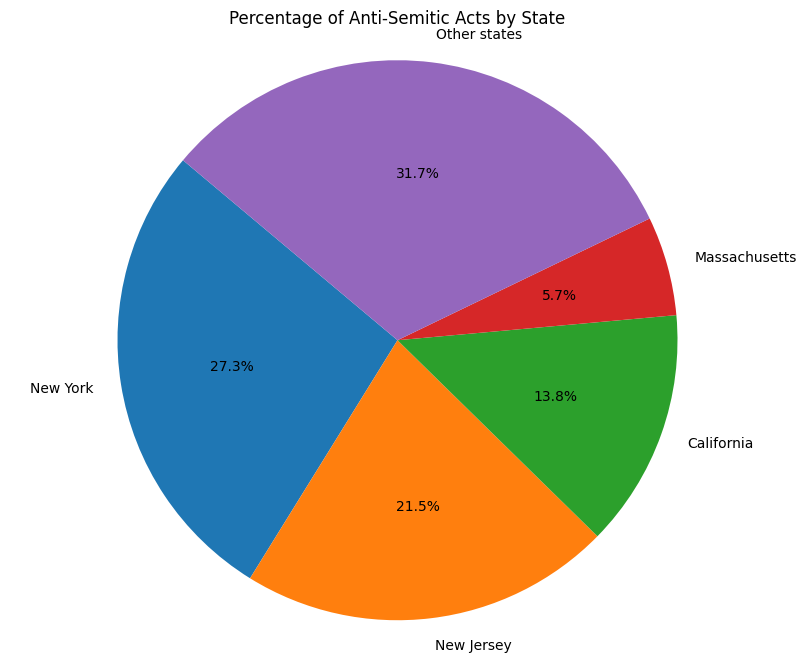

In [10]:
# Calculate the percentage of anti-Semitic acts by state
percentage_per_state = (anti_jewish_data['state_name'].value_counts() / len(anti_jewish_data)) * 100

# Group states with less than 5% of the total anti-Semitic acts into "Other states"
other_states_threshold = 5
main_states = percentage_per_state[percentage_per_state >= other_states_threshold]
other_states = percentage_per_state[percentage_per_state < other_states_threshold]
other_states_combined = pd.Series([other_states.sum()], index=['Other states'])

# Combine main states and other states
final_percentage_per_state = pd.concat([main_states, other_states_combined])

# Plotting
plt.figure(figsize=(10, 8))
final_percentage_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Anti-Semitic Acts by State')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



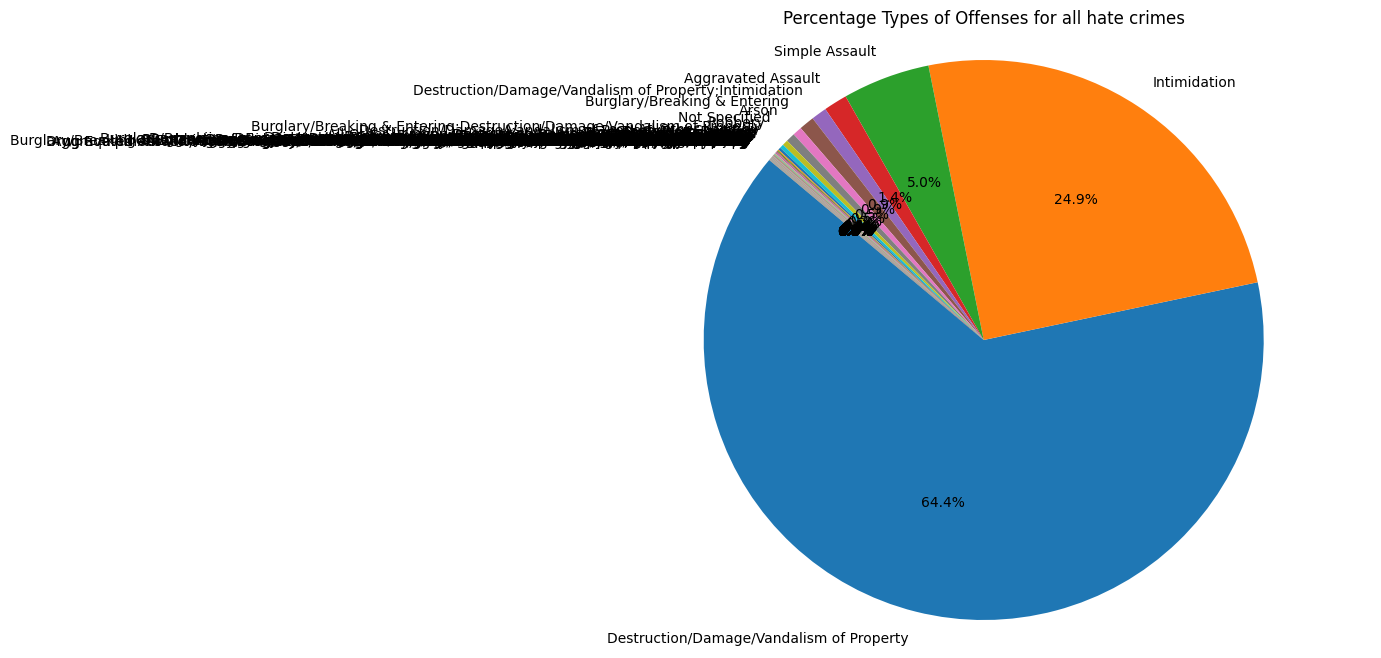

In [11]:
percentage_per_state = (anti_jewish_data['offense_name'].value_counts() / len(anti_jewish_data)) * 100

# Plotting
plt.figure(figsize=(10, 8))
percentage_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Types of Offenses for all hate crimes')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Analysis, hypothesis testing, & ML

Formulate hypotheses about hate crimes based on your EDA findings. For example, you may hypothesize that hate crimes are more prevalent in certain regions or during specific time periods.

Use statistical tests or machine learning algorithms to test these hypotheses and build predictive models if applicable. For example, you could use classification algorithms to predict the likelihood of hate crimes based on demographic and socio-economic factors.

In [12]:
#import data from the ADL on antisemetic incidents in the last 3 years
file_path = 'HEATMapData (1).csv'

#read into a DataFrame
adl_data = pd.read_csv(file_path)

adl_relevant = adl_data[['date','state', 'type', 'description']]

# Create new column of "data_year"
adl_relevant['date'] = pd.to_datetime(adl_relevant['date'], errors='coerce')

# Extract year and create a new column
adl_relevant['data_year'] = adl_relevant['date'].dt.year

# Split the 'type' column into two separate columns
adl_relevant[['bias_type', 'offense type']] = adl_relevant['type'].str.split(':', n=1, expand=True)

# Drop the original 'type' column
adl_relevant.drop(columns=['type'], inplace=True)

# Display the DataFrame with the new columns
print(adl_relevant)


            date state                                        description  \
0     2023-12-31    CA  An individual vandalized the building of a Jew...   
1     2023-12-31    MD  A sign calling for the return of Israeli hosta...   
2     2023-12-31    NJ  A swastika and the words, "Don't be Jewish" we...   
3     2023-12-31    TX  A synagogue was targeted with an antisemitic b...   
4     2023-12-31    TX  A synagogue was targeted with an antisemitic b...   
...          ...   ...                                                ...   
51865        NaT    CO  Jewish woman received an email from a neighbor...   
51866        NaT    NJ  Two swastikas drawn on mats at private residence.   
51867        NaT    MA                                       Confidential   
51868        NaT    FL  High school soccer fans chanted anti-Semitic s...   
51869        NaT    MA                                       Confidential   

       data_year             bias_type offense type  
0         2023.0  Ant

C:\Users\eitan\AppData\Local\Temp\ipykernel_35984\1768257200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adl_relevant['date'] = pd.to_datetime(adl_relevant['date'], errors='coerce')
C:\Users\eitan\AppData\Local\Temp\ipykernel_35984\1768257200.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adl_relevant['data_year'] = adl_relevant['date'].dt.year
C:\Users\eitan\AppData\Local\Temp\ipykernel_35984\1768257200.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

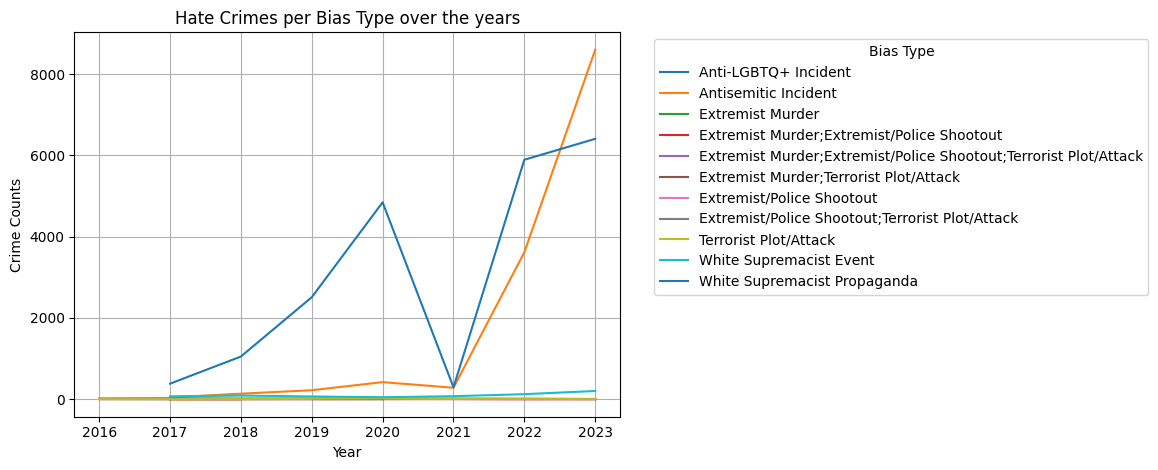

In [13]:
crime_counts = adl_relevant.groupby(['data_year', 'bias_type']).size().reset_index(name='count_of_crimes')

pivot_table = crime_counts.pivot(index='data_year', columns='bias_type', values='count_of_crimes')

for category in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[category], label=category)

plt.title('Hate Crimes per Bias Type over the years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()

plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [14]:
anti_jewish_data = expanded_data[expanded_data['bias_desc'] == 'Anti-Jewish'][['data_year', 'state_name']]


#anti_jewish_data = expanded_data[['data_year', 'state_name']]

print(anti_jewish_data)



        data_year state_name
0            1991   Arkansas
1            1991   Arkansas
2            1991   Arkansas
3            1991   Arkansas
4            1991   Arkansas
...           ...        ...
241661       2022    Wyoming
241662       2022    Wyoming
241662       2022    Wyoming
241662       2022    Wyoming
241662       2022    Wyoming

[277048 rows x 2 columns]


In [15]:
# Filter data for years 2016 onwards
data_2016_onward = anti_jewish_data[anti_jewish_data['data_year'] >= 2016]

# Drop irrelevant columns and encode categorical variables
data_encoded = pd.get_dummies(data_2016_onward, columns=['state_name'])

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['data_year'])  # Features
y = data_encoded['data_year']  # Target variable (year)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.21314860454272963
Classification Report:
              precision    recall  f1-score   support

        2016       0.00      0.00      0.00      1463
        2017       0.17      0.18      0.18      1727
        2018       0.15      0.02      0.04      1686
        2019       0.18      0.03      0.05      2000
        2020       0.25      0.26      0.25      2478
        2021       0.23      0.22      0.22      2746
        2022       0.21      0.53      0.30      2913

    accuracy                           0.21     15013
   macro avg       0.17      0.18      0.15     15013
weighted avg       0.18      0.21      0.17     15013



c:\Users\eitan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eitan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eitan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [16]:
# Filter data for years 2016 onwards
data_2016_onward = anti_jewish_data[anti_jewish_data['data_year'] >= 2016]

# Drop irrelevant columns and encode categorical variables
data_encoded = pd.get_dummies(data_2016_onward, columns=['state_name'])

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['data_year'])  # Features
y = data_encoded['data_year']  # Target variable (year)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Other evaluation metrics can be used depending on the context of your regression task
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 3.7246683112906487
R-squared: 0.035991080319723756


## Insight & Policy Decision


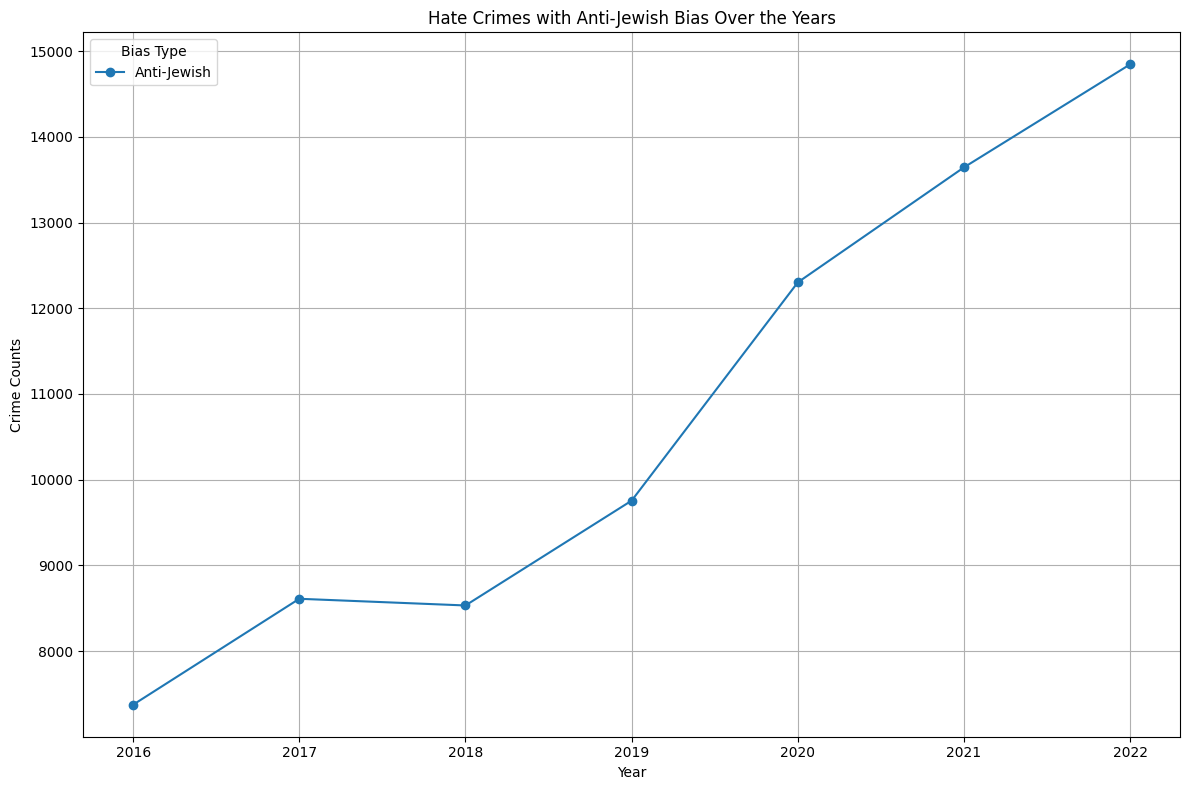

In [17]:
crime_counts_anti_jewish = data_2016_onward.groupby('data_year').size().reset_index(name='count_of_crimes')

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(crime_counts_anti_jewish['data_year'], crime_counts_anti_jewish['count_of_crimes'], marker='o', label='Anti-Jewish')

plt.title('Hate Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Bias Type')
plt.show()